In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append("..")
sys.path.append("../utils")
import utils

In [2]:
# read and process dataset
data = utils.load_dataset("../data/all_data_edit.txt")
# print head of the dataframe
data[0:5]

,id,class,x,y,z,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,104223,0,-95.535490,-8.022506,2.532864,144,143,144,146,145,142,141,149,138,145,141,150,149,142,143,152,142,146,144,150,140,142,139,151,141,149,138,156,220,318,342,267,221,191,171,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,104224,0,-95.652666,-8.091995,2.563862,143,148,143,150,138,139,144,149,144,139,142,146,141,141,148,150,143,149,143,143,145,144,147,150,141,147,143,152,145,163,228,307,300,252,199,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,104225,0,-95.754938,-8.164938,2.558861,142,151,138,148,147,139,142,151,145,145,145,150,144,147,141,150,142,143,147,145,146,148,146,148,143,149,138,180,276,329,288,246,205,173,149,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,104226,0,-95.855210,-8.237942,2.548859,145,149,143,146,142,144,139,153,145,150,147,150,142,146,136,150,140,149,141,151,142,146,144,150,142,152,147,143,179,276,338,298,224,182,156,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104228,0,-95.505481,-7.330005,2.583865,143,149,145,146,141,149,144,147,145,149,148,151,145,149,138,155,141,146,143,146,146,150,142,150,141,149,142,150,179,284,294,247,191,165,151,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


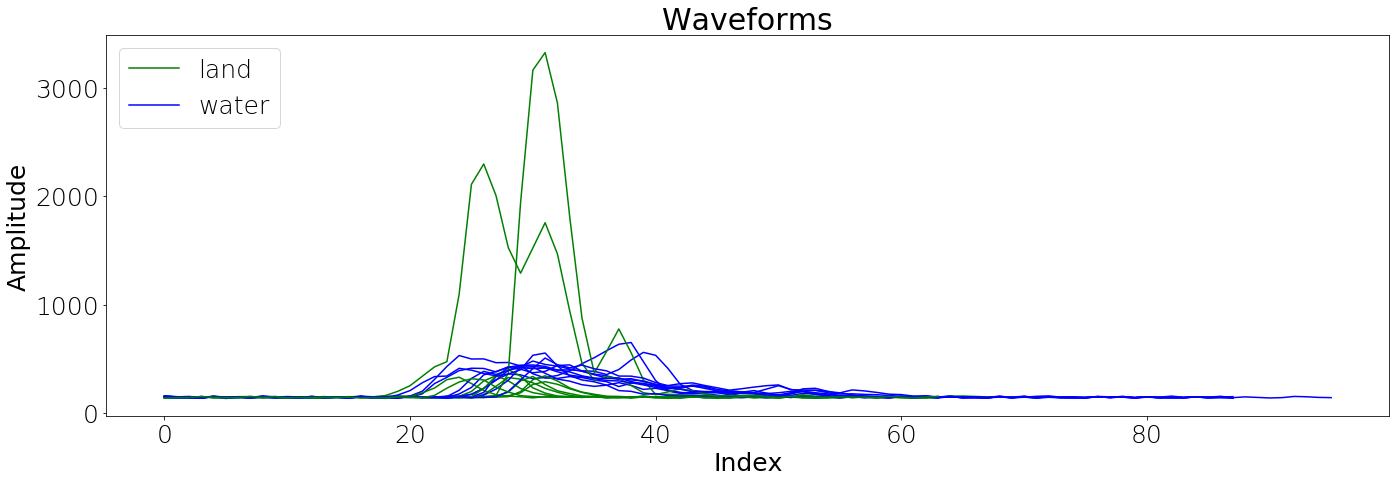

In [3]:
# plot some of the waveforms
samplecount = 20
# choose #samplecount many random samples from the dataframe
idxs = np.random.choice(data.shape[0], samplecount)
df_samples = data.iloc[idxs].reset_index().copy()
utils.plot_waveforms(df_samples)

* Stellen der Peaks können sehr unterschiedlich sein (auf der x-Achse).
* Wenn ein Peak auftritt, dann ist das Verhalten aber relativ gleich (geht steil hoch, dann steil runter).
* Wasser vs. Land lässt sich schon rein visuell gut klassifizieren (das "Abfallen" ist komplett anders).
* Ein 1D-[Convolutional Neural Network](https://de.wikipedia.org/wiki/Convolutional_Neural_Network) würde an dieser Stelle sicher Sinn ergeben.
* Daten sind nicht gleich Lang: da einige Wave-Forms früher und andere später 0 erreichen, wird es schwierig, ein NN mit einer fixen Größe zu verwenden.
    * Ab index >100 kommt "Müll".
    * Alternativ können alle Waveforms auf eine konstante Länge "gezogen" oder "gekürzt" werden.
    * Ein [Recurrent Neural Network](https://en.wikipedia.org/wiki/Recurrent_neural_network), das entlang der x-Achse geschoben wird, könnte aushelfen.
* Ich denke nicht, dass eine besonders aufwändige Netzwerkarchitektur verwendet werden muss (sprich viele Layer).

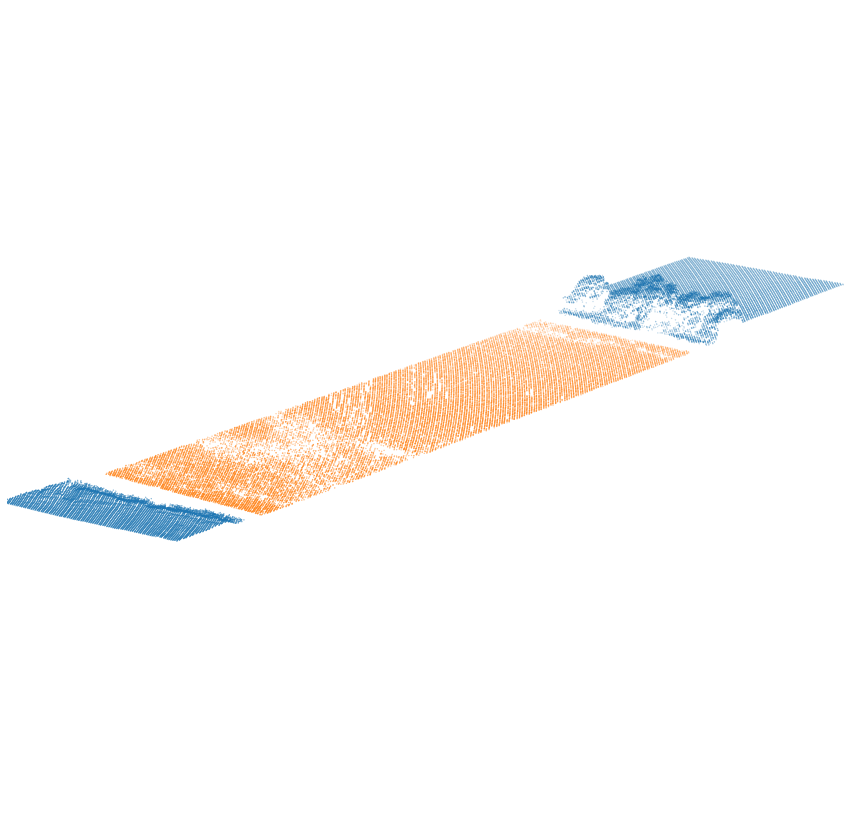

In [4]:
# 3d-plot of the point cloud
utils.plot_pcl(data, plotsize=15)

* Der Datensatz ist relativ homogen (nicht besonders gut), allerdings ziemlich groß.
* Die Performance von einem Klassifikator, der auf diesem Datensatz trainiert wird, ist nicht notwendigerweise maßgebend für die Performance auf anderen Datensätzen.
* Wie sieht es z.B. mit flacheren Gewässern aus, bei denen der Unterschied nicht so stark zu sehen ist?